In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('uspsdata.txt',sep="\t",header=None)
label=pd.read_csv('uspscl.txt',sep="\t",header=None)

In [3]:
label[0].value_counts()

 1    100
-1    100
Name: 0, dtype: int64

In [55]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(data,label,test_size=0.2,random_state=100)

#### a) Train a linear SVM with soft margin. Vary the soft margin parameter and plot the classification error as a function of the margin parameter. Discuss the results.

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

train_error_score=[]
c_=[]
for i in range(-10,3):
    c=10**i
    c_.append(i)
    clf=SVC(C=c,kernel="linear",random_state=100)
    clf.fit(xtrain,ytrain)
    p=clf.predict(xtrain)
    train_error_score.append(1-accuracy_score(ytrain,p))
    

C:\Anacon\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


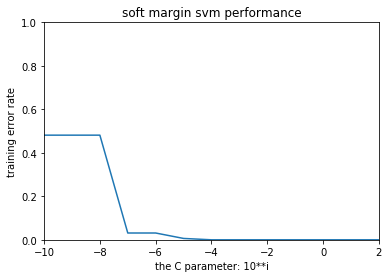

In [7]:
plt.plot(c_,train_error_score)
plt.ylabel("training error rate")
plt.xlabel("the C parameter: 10**i")
plt.title("soft margin svm performance")
plt.ylim(0,1)
plt.xlim(-10,2)
plt.show()

In [47]:
train=[]
test=[]
for i in range(-15,15):
    clf=SVC(C=10**i,kernel="linear",random_state=10)
    clf.fit(xtrain,ytrain)
    p_train=clf.predict(xtrain)
    p_test=clf.predict(xtest)
    train.append(accuracy_score(ytrain,p_train))
    test.append(accuracy_score(ytest,p_test))
cindex=[i for i in range(-15,15)]
pd.concat([pd.DataFrame(train,cindex,columns=["training accuracy"]),pd.DataFrame(test,cindex,columns=["testing accuracy"])],axis=1)

C:\Anacon\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,training accuracy,testing accuracy
-15,0.51875,0.425
-14,0.51875,0.425
-13,0.51875,0.425
-12,0.51875,0.425
-11,0.51875,0.425
-10,0.51875,0.425
-9,0.51875,0.425
-8,0.51875,0.425
-7,0.96875,1.000
-6,0.96875,1.000


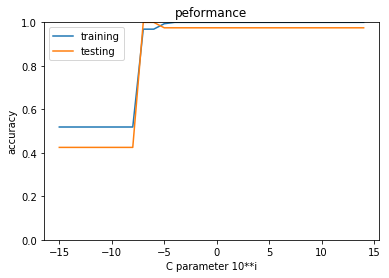

In [66]:
c=[i for i in range(-15,15)]
plt.plot(c,train,label="training")
plt.plot(c,test,label="testing")
plt.legend()
plt.ylim(0,1)
plt.xlabel("C parameter 10**i")
plt.ylabel("accuracy")
plt.title("peformance")
plt.show()

According to the plot and table above (the index of the table is the power raised by based 10 )
When the c is set >1e-5, the training and testing accuracy is about 1.0 and 0.975, and the training and testing error is about 0.0 and 0.025. Since the training error is 0, the SVM is not a soft margin. Therefore, we should only look at the results that have training error less than 0 or the accuracy less than 1. 

For this problem the best classifier seems to be when the c parameter for SVM is set as 1e-5  since the training accuracy yields the best performance (0.993), and the model is not overfitting because the difference between the accuracy for training set and testing set is less than 0.1.


#### b)Train a non-linear SVM with soft margin and Gaussian kernel. Vary both the soft margin parameter and the Gaussian kernel bandwidth (sigma) and plot the classification error as a function of the margin parameter and kernel bandwidth.

In [91]:
train_accuracy_score={}
test_accuracy_score={}
train_error_score={}
test_error_score={}
c_=[]
for i in range(-15,10):
    for g in range(-15,15):
        c=10**i
        c_.append(i)
        G=5**g
        clf=SVC(C=c,kernel="rbf",gamma=G,random_state=100)
        clf.fit(xtrain,ytrain)
        p_train=clf.predict(xtrain)
        p_test=clf.predict(xtest)
        train_accuracy_score[(i,g)]=np.round((accuracy_score(ytrain,p_train)),3)
        test_accuracy_score[(i,g)]=np.round((accuracy_score(ytest,p_test)),3)

        train_error_score[(i,g)]=np.round((1-accuracy_score(ytrain,p_train)),3)
        test_error_score[(i,g)]=np.round((1-accuracy_score(ytest,p_test)),3)


C:\Anacon\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


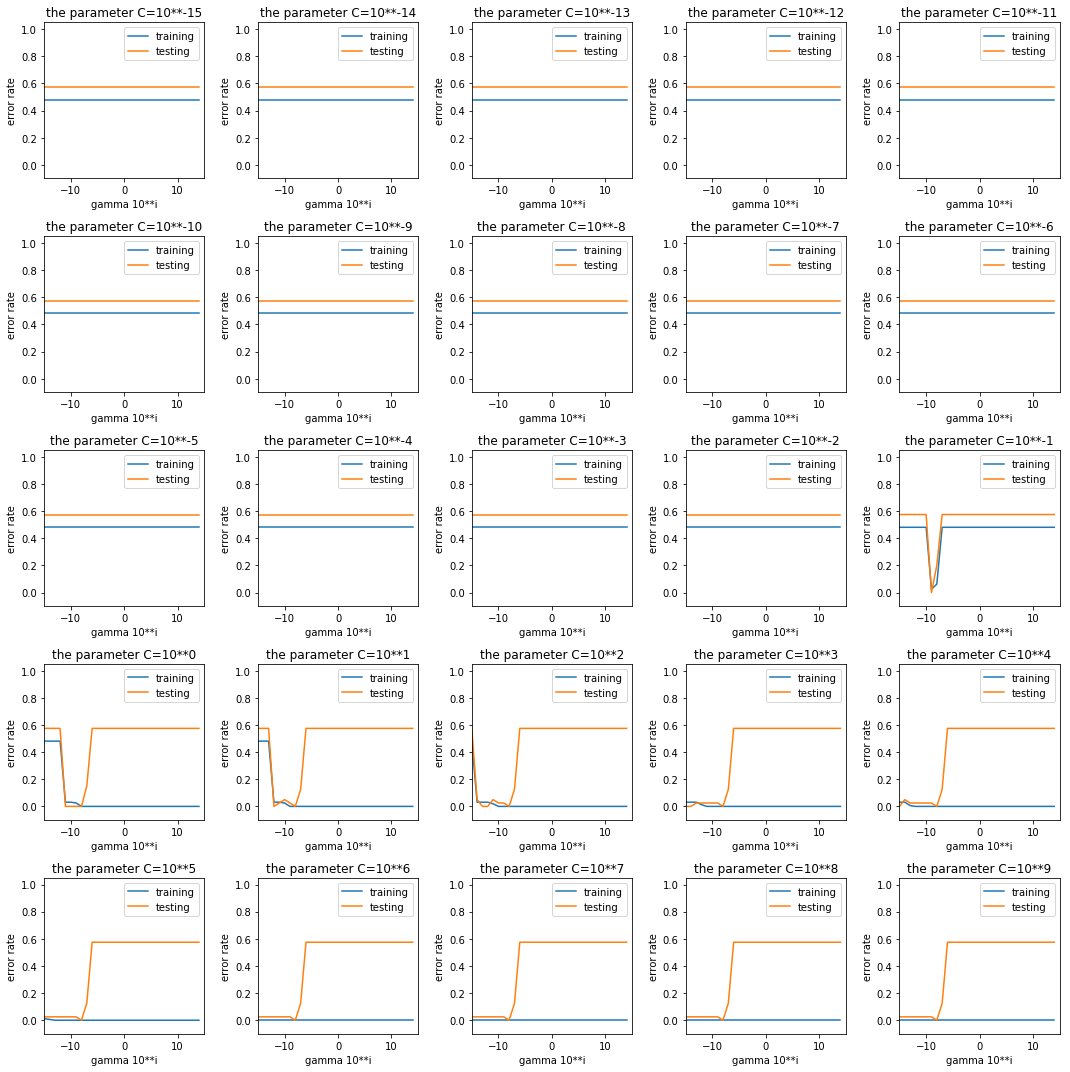

In [93]:
lst=[g for g in range(-15,15)]
train_accuracy_value=list(train_accuracy_score.values())
test_accuracy_value=list(test_accuracy_score.values())
train_error_value=list(train_error_score.values())
test_error_value=list(test_error_score.values())
plt.subplots(5,5,figsize=(15,15))
title=[-15,-10,-5,0,5]

for i in range(5):
    for j in range(5):
        ax=plt.subplot2grid((5,5), (i,j))
        ax.plot(lst,train_error_value[30*j:30*(j+1)],label="training")
        ax.plot(lst,test_error_value[30*j:30*(j+1)],label="testing")
        ax.set_title("the parameter C=10**{}".format(j+(title[0])))
        ax.set_xlabel("gamma 10**i")
        ax.set_ylim(-0.1,1.05)
        ax.set_xlim(-15,15)
        ax.set_ylabel("error rate")
        plt.legend()
    train_error_value=train_error_value[150:]
    test_error_value=test_error_value[150:]
    title=title[1:]
plt.tight_layout()
plt.show()

From the above analysis, the C parameter and gamma parameter have been experimented from 1e-15 to 1e+9 and 1e-15 to 1e+15. To choose a classifier with a soft margin, we have to exclude the model with C set as C > 1e+4 since when C > 1e+4 the training error starts to become 0.

From the above visualization, we are able to learn that when C is set as 1e+4 and when the gamma is set as 1e-13 the accuracy is the highest among all, which is about 0.994 in training set and 0.975 in testing set.

*Note that to make this notebook more concised I didn't expend the list for both training and testing accuracy. But when I was looking for the optimal gamma and c, I first used the visualization above to narrow down the parameter range, then use the table below to query the gamma and c for the optimal performance. (note that the table below represent the plot when c=1e+4, and the index of the table is (c,gamma).) 


In [89]:
index=list(train_accuracy_score.keys())[570:600]
train_accuracy_value=list(train_accuracy_score.values())[570:600]
test_accuracy_value=list(test_accuracy_score.values())[570:600]
pd.concat([pd.DataFrame(train_accuracy_value,index,columns=["training accuracy"]),pd.DataFrame(test_accuracy_value,index,columns=["testing accuracy"])],axis=1)

,training accuracy,testing accuracy
"(4, -15)",0.969,1.000
"(4, -14)",0.969,0.950
"(4, -13)",0.994,0.975
"(4, -12)",1.000,0.975
"(4, -11)",1.000,0.975
"(4, -10)",1.000,0.975
"(4, -9)",1.000,0.975
"(4, -8)",1.000,1.000
"(4, -7)",1.000,0.875
"(4, -6)",1.000,0.425
